In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manthan0227/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


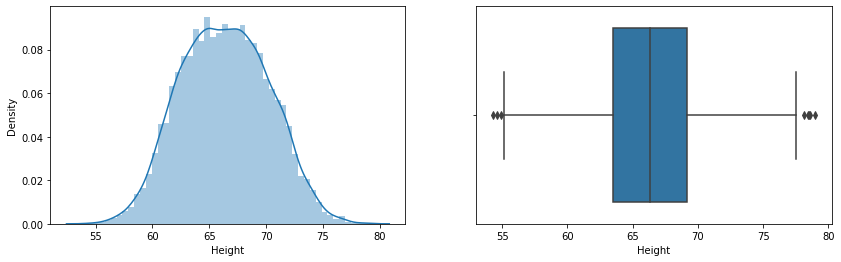

In [8]:
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.distplot(df['Height'])

plt.subplot(1,2,2)
sns.boxplot(df['Height'])

plt.show()

In [9]:
upper_limit = df['Height'].quantile(0.99) # we have to set this percentile value
lower_limit = df['Height'].quantile(0.01) # sum of percentile values are 1

In [10]:
print('Upper Limit: ', upper_limit)
print('Lower Limit: ', lower_limit)

Upper Limit:  74.7857900583366
Lower Limit:  58.13441158671655


## Trimming

In [11]:
new_df = df[(df['Height']>lower_limit) & (df['Height']<upper_limit)]

In [13]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [15]:
new_df.shape # 10000-9800 = 200 outilers are removed by trimming

(9800, 3)

c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

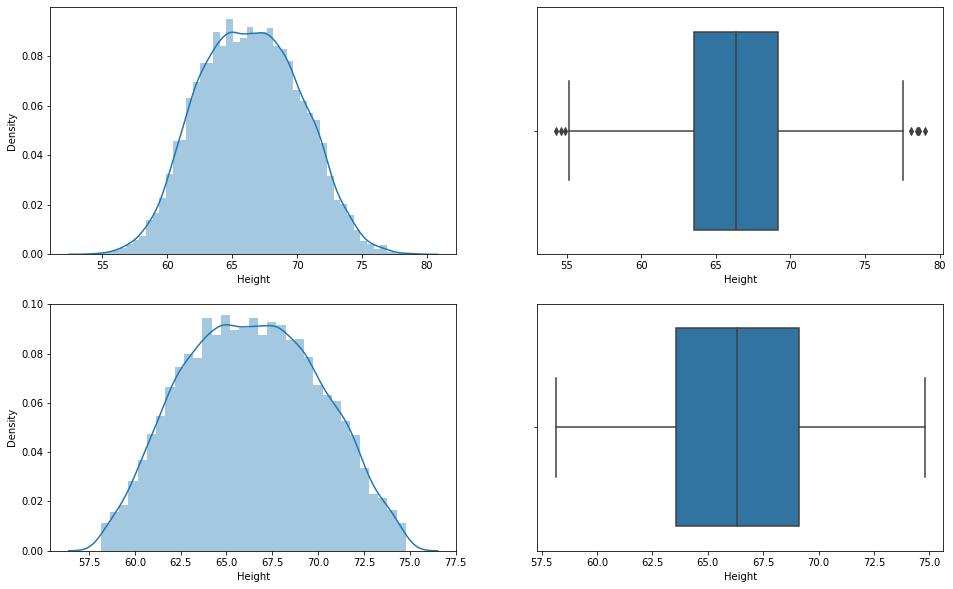

In [17]:
# comparing
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.subplot(2,2,3)
sns.distplot(new_df['Height'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Height'])

plt.show()

## Capping == Winsorization(in Percentile Method)

In [18]:
df['Height'] = np.where(
    df['Height']>upper_limit,
    upper_limit,
    np.where(df['Height']<lower_limit,
    lower_limit,
    df['Height']
    )
    )

In [19]:
df.shape

(10000, 3)

In [20]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

c:\python\python3.9.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


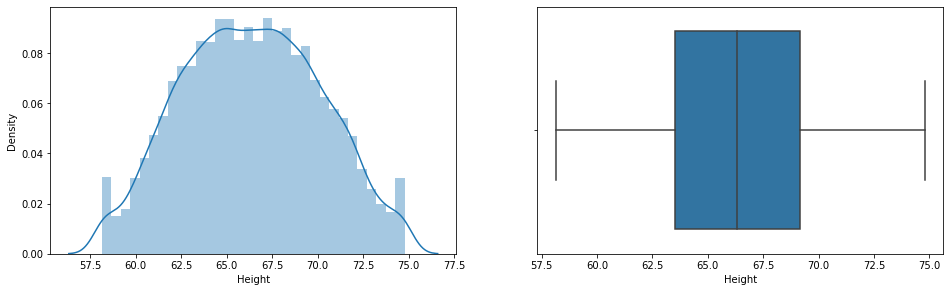

In [21]:
# Comparing
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'])

plt.show()